# BFit Technical Assessment 

The purpose of this technical assessment is to evaluate your ability to manipulate and analyze data from a dataset, and conceptualize the steps to prepare the data for training a machine learning model. This model should be able to construct a workout plan from the given exercise dataset.

For the exercise dataset, assume that it contains the following columns:

ID: A unique identifier for each exercise.
Title: The name of the exercise.
Desc: A short description of the exercise
Type: The type of the exercise (e.g., cardio, strength, flexibility).
BodyPart: The primary muscle group that the exercise targets.
Equipment: The equipment required for the exercise (if any).
Difficulty: A rating indicating the difficulty level of the exercise.
Rating: The rating users give on average to the exercise.

Task 1: Dataset Exploration

Using Python and appropriate libraries such as pandas, numpy, and matplotlib, perform exploratory data analysis on the exercise dataset.

Load the dataset and examine its structure and contents.
Provide summary statistics for each column (e.g., count, mean, standard deviation, min, max for numeric columns; count, unique, top, frequency for categorical columns).
Create visualizations to help understand the data distribution, such as histograms for numeric columns, bar plots for categorical columns, and a correlation matrix for the entire dataset.

Task 2: Data Preprocessing & Feature Engineering

Describe the steps you would take to preprocess and prepare the data for training a machine learning model. This might include:

Handling missing values: How would you identify and deal with missing data?
Encoding categorical features: What encoding strategies would you use for categorical columns?
Feature scaling: How would you handle feature scaling, if necessary?
Feature engineering: Can you create new features that might be beneficial for a machine learning model?

# Task 1: Dataset Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [2]:
# Load the dataset
df = pd.read_csv('megaGymDataset.csv')

In [3]:
# Examine the structure and contents
df.head()

,Unnamed: 0,Title,Desc,Type,BodyPart,Equipment,Level,Rating,RatingDesc
0,0,Partner plank band row,The partner plank band row is an abdominal exe...,Strength,Abdominals,Bands,Intermediate,0.0,NaN
1,1,Banded crunch isometric hold,The banded crunch isometric hold is an exercis...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
2,2,FYR Banded Plank Jack,The banded plank jack is a variation on the pl...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
3,3,Banded crunch,The banded crunch is an exercise targeting the...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
4,4,Crunch,The crunch is a popular core exercise targetin...,Strength,Abdominals,Bands,Intermediate,NaN,NaN


In [4]:
df = df.drop('Unnamed: 0', axis=1)

In [5]:
# Examine the structure and contents
df.head()

,Title,Desc,Type,BodyPart,Equipment,Level,Rating,RatingDesc
0,Partner plank band row,The partner plank band row is an abdominal exe...,Strength,Abdominals,Bands,Intermediate,0.0,NaN
1,Banded crunch isometric hold,The banded crunch isometric hold is an exercis...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
2,FYR Banded Plank Jack,The banded plank jack is a variation on the pl...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
3,Banded crunch,The banded crunch is an exercise targeting the...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
4,Crunch,The crunch is a popular core exercise targetin...,Strength,Abdominals,Bands,Intermediate,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2918 entries, 0 to 2917
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       2918 non-null   object 
 1   Desc        1368 non-null   object 
 2   Type        2918 non-null   object 
 3   BodyPart    2918 non-null   object 
 4   Equipment   2918 non-null   object 
 5   Level       2918 non-null   object 
 6   Rating      1031 non-null   float64
 7   RatingDesc  862 non-null    object 
dtypes: float64(1), object(7)
memory usage: 182.5+ KB


In [7]:
# Summary statistics
df.describe()

,Rating
count,1031.000000
mean,5.919690
std,3.584607
min,0.000000
25%,3.000000
50%,7.900000
75%,8.700000
max,9.600000


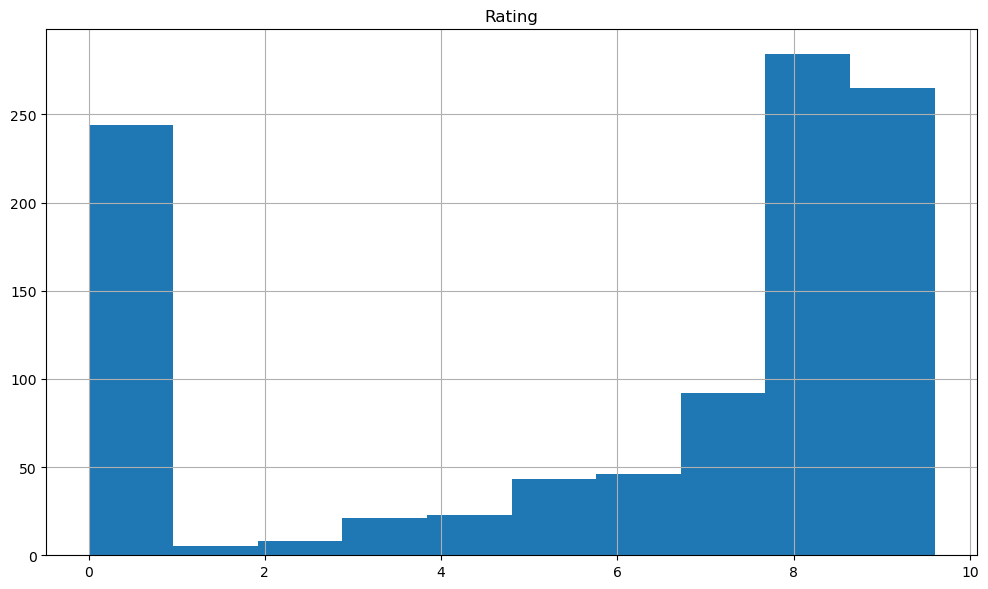

In [8]:
# Data distribution visualizations
numeric_columns = ['Rating']
df[numeric_columns].hist(bins=10, figsize=(10, 6))
plt.tight_layout()
plt.show()

In [24]:
# Find the type of exercises with the lowest rating
lowest_rating_type = df.groupby('Type')['Rating'].mean().idxmin()
print("Type with the lowest rating:", lowest_rating_type)

Type with the lowest rating: Plyometrics


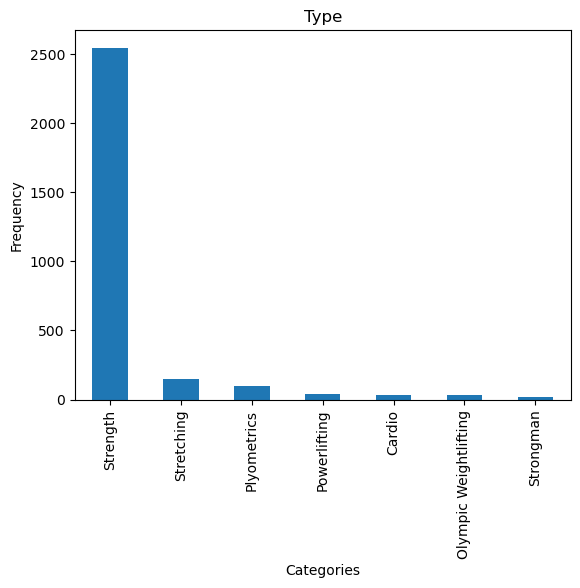

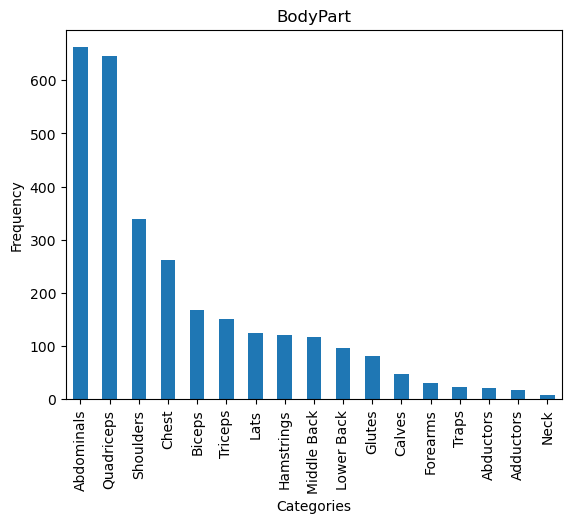

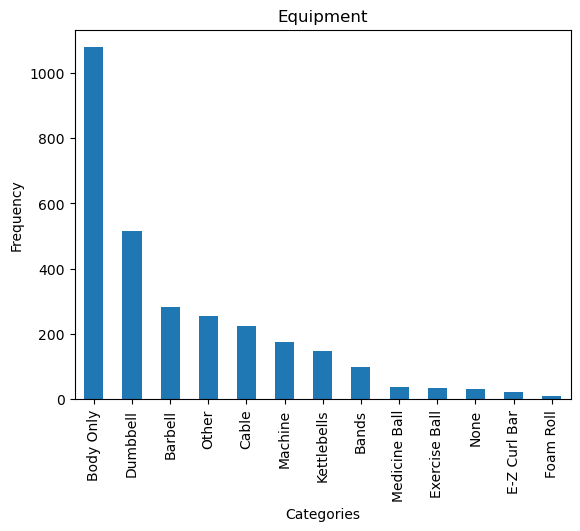

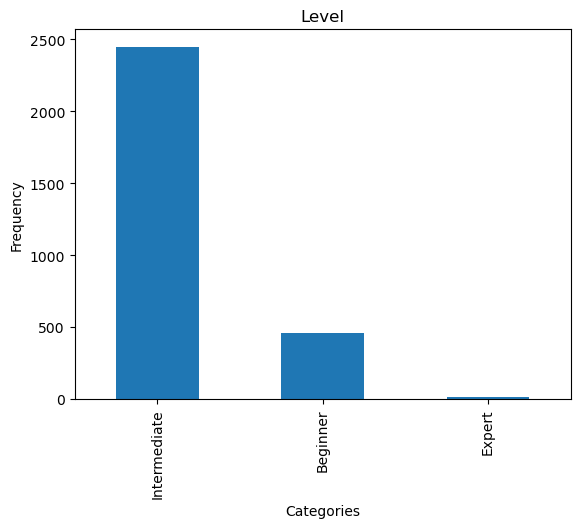

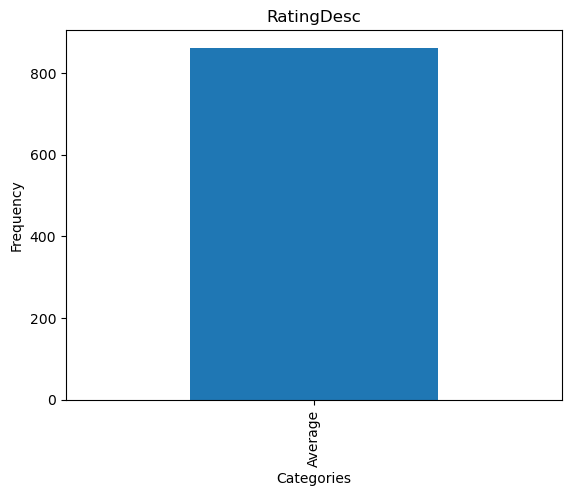

In [9]:
categorical_columns = ['Type', 'BodyPart', 'Equipment', 'Level', 'RatingDesc']
for column in categorical_columns:
    df[column].value_counts().plot(kind='bar')
    plt.title(column)
    plt.xlabel('Categories')
    plt.ylabel('Frequency')
    plt.show()

In [10]:
# Create a dictionary to store the metrics
metrics = {
    'Count': [],
    'Unique': [],
    'Top': [],
    'Frequency': []
}

# Calculate count, unique values, top value, and frequency for each categorical column
for column in categorical_columns:
    metrics['Count'].append(df[column].count())
    metrics['Unique'].append(df[column].nunique())
    metrics['Top'].append(df[column].value_counts().idxmax())
    freq_dict = df[column].value_counts().to_dict()
    metrics['Frequency'].append(freq_dict)

# Create a new DataFrame from the metrics dictionary
result_df = pd.DataFrame(metrics, index=categorical_columns)

# Set the max_colwidth option to show the full dictionaries in the Frequency column
pd.set_option('display.max_colwidth', None)

# Display the result DataFrame as a table
display(result_df)

,Count,Unique,Top,Frequency
Type,2918,7,Strength,"{'Strength': 2545, 'Stretching': 147, 'Plyometrics': 97, 'Powerlifting': 37, 'Cardio': 35, 'Olympic Weightlifting': 35, 'Strongman': 22}"
BodyPart,2918,17,Abdominals,"{'Abdominals': 662, 'Quadriceps': 646, 'Shoulders': 340, 'Chest': 262, 'Biceps': 168, 'Triceps': 151, 'Lats': 124, 'Hamstrings': 121, 'Middle Back': 118, 'Lower Back': 97, 'Glutes': 81, 'Calves': 47, 'Forearms': 31, 'Traps': 24, 'Abductors': 21, 'Adductors': 17, 'Neck': 8}"
Equipment,2918,13,Body Only,"{'Body Only': 1078, 'Dumbbell': 516, 'Barbell': 282, 'Other': 254, 'Cable': 226, 'Machine': 175, 'Kettlebells': 149, 'Bands': 100, 'Medicine Ball': 38, 'Exercise Ball': 35, 'None': 32, 'E-Z Curl Bar': 22, 'Foam Roll': 11}"
Level,2918,3,Intermediate,"{'Intermediate': 2446, 'Beginner': 459, 'Expert': 13}"
RatingDesc,862,1,Average,{'Average': 862}


/tmp/ipykernel_12645/442697728.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


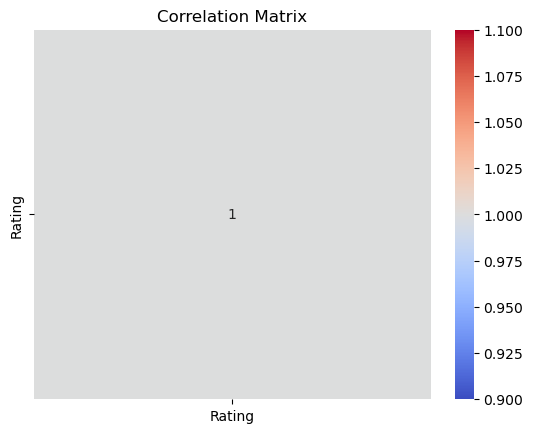

In [11]:
# Calculate the correlation matrix
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

As there is only one numerical column in the given dataset, the correlation matrix doesnt show anything important!
I just provided it only because it was mention in the project description.

# Task 2: Data Preprocessing & Feature Engineering

In [12]:
# Find out the number of null values in each coulmn
df.isnull().sum()

Title            0
Desc          1550
Type             0
BodyPart         0
Equipment        0
Level            0
Rating        1887
RatingDesc    2056
dtype: int64

In [13]:
df.shape

(2918, 8)

Given that a significant portion of the data is missing in the Desc, Rating, and RatingDesc columns (approximately 1800 out of 2900 rows), removing the missing values entirely may result in a substantial loss of data. In such cases, alternative approaches need to be considered. 

In [14]:
# Handling missing values in the Rating column
df['Rating'].fillna(df['Rating'].mean(), inplace=True)

# Handling missing values in the Desc column
df['Desc'].fillna('Not Available', inplace=True)

# Handling missing values in the RatingDesc column
df['RatingDesc'].fillna('Not Available', inplace=True)

Handling Missing Values in the Rating Column:

Decision: Use mean imputation to fill in the missing values in the Rating column.
Reason: Mean imputation is a reasonable choice when a substantial number of missing values are present, as it helps to preserve the overall distribution and minimize the impact on subsequent analysis. However, it's important to note that imputing missing values in the Rating column assumes that the missingness is random and does not introduce bias into the analysis.


Handling Missing Values in the Desc and RatingDesc Column:

Decision: Convert the Desc and RatingDesc columns into a new category or label, such as "Not Available," to represent the missing values.
Reason: By doing so, we retain the information about whether users provided descriptions for the ratings while acknowledging the missingness as a separate category.

In [15]:
df

,Title,Desc,Type,BodyPart,Equipment,Level,Rating,RatingDesc
0,Partner plank band row,The partner plank band row is an abdominal exercise where two partners perform single-arm planks while pulling on the opposite ends of an exercise band. This technique can be done for time or reps in any ab-focused workout.,Strength,Abdominals,Bands,Intermediate,0.00000,Not Available
1,Banded crunch isometric hold,"The banded crunch isometric hold is an exercise targeting the abdominal muscles, particularly the rectus abdominis or ""six-pack"" muscles. The band adds resistance and continuous tension to this popular exercise.",Strength,Abdominals,Bands,Intermediate,5.91969,Not Available
2,FYR Banded Plank Jack,"The banded plank jack is a variation on the plank that involves moving the legs in and out for repetitions. Having a band around the thighs forces the lower body to work harder, particularly the hips and glutes. The plank jack is commonly performed as part of a bodyweight circuit, or as part of a dynamic warm-up.",Strength,Abdominals,Bands,Intermediate,5.91969,Not Available
3,Banded crunch,"The banded crunch is an exercise targeting the abdominal muscles, particularly the rectus abdominis or ""six-pack"" muscles. The band adds resistance and continuous tension to this popular exercise.",Strength,Abdominals,Bands,Intermediate,5.91969,Not Available
4,Crunch,"The crunch is a popular core exercise targeting the rectus abdominis, or ""six-pack"" muscles, as well as the obliques. It has been the centerpiece of many ab-focused workouts, due to both its simplicity and the intense burn and mind-muscle connection it produces. It can be performed for time or reps as part of the ab-focused portion of any workout.",Strength,Abdominals,Bands,Intermediate,5.91969,Not Available
...,...,...,...,...,...,...,...,...
2913,EZ-bar skullcrusher-,"The EZ-bar skullcrusher is a popular exercise targeting the triceps muscles. Contrary to what the name implies, the bar should actually come down behind the head. It is usually performed for moderate to high reps as part of an upper-body or arms-focused workout.",Strength,Triceps,E-Z Curl Bar,Intermediate,8.10000,Average
2914,Lying Close-Grip Barbell Triceps Press To Chin,Not Available,Strength,Triceps,E-Z Curl Bar,Beginner,8.10000,Average
2915,EZ-Bar Skullcrusher - Gethin Variation,"The EZ-bar skullcrusher is a popular exercise targeting the triceps muscles. The EZ-bar is used more often than a straight bar. As for the name, that’s worst-case scenario. The bar should actually come down behind the head. It is usually performed for moderate to high reps as part of an upper body or arms-focused workout. No need to chase a 1RM on this move!",Strength,Triceps,E-Z Curl Bar,Intermediate,5.91969,Not Available
2916,TBS Skullcrusher,"The EZ-bar skullcrusher is a popular exercise targeting the triceps muscles. The EZ-bar is used more often than a straight bar. As for the name, that’s worst-case scenario. The bar should actually come down behind the head. It is usually performed for moderate to high reps as part of an upper body or arms-focused workout. No need to chase a 1RM on this move!",Strength,Triceps,E-Z Curl Bar,Intermediate,5.91969,Not Available


In [16]:
df.isnull().sum()

Title         0
Desc          0
Type          0
BodyPart      0
Equipment     0
Level         0
Rating        0
RatingDesc    0
dtype: int64

For the Rating column in the project, since it is the only numerical column, applying feature scaling is optional. The choice of whether to scale the Rating column depends on the specific requirements of the machine learning algorithms we plan to use.
However, it's always a good practice to experiment with both scaled and unscaled versions of the data and evaluate their impact on the performance of your models.

In [17]:
# Feature scaling
scaler = StandardScaler()
df['Rating'] = scaler.fit_transform(df['Rating'].values.reshape(-1, 1))

In order to perform feature engineering on the dataset, Decided to extract relevant keywords or phrases from the exercise descriptions in the 'Desc' column. This could involve using natural language processing techniques such as tokenization and part-of-speech tagging. These keywords or phrases can then be used as features to capture specific attributes or themes associated with each exercise

In [18]:
nltk.download('averaged_perceptron_tagger')

# Function to extract keywords from text
def extract_keywords(text):
    # Tokenize the text into individual words
    tokens = word_tokenize(text)
    
    # Filter out stopwords (common words with little significance)
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token.lower() for token in tokens if token.lower() not in stop_words]
    
    # Perform part-of-speech tagging
    tagged_tokens = nltk.pos_tag(filtered_tokens)
    
    # Extract keywords based on specific part-of-speech patterns
    keywords = [word for word, pos in tagged_tokens if pos.startswith('NN') or pos.startswith('VB')]
    
    return keywords

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/shivaramezani/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [19]:
# Apply the extract_keywords function to the 'Desc' column
df['Keywords'] = df['Desc'].apply(extract_keywords)

Next step is Creating features that capture the variation or diversity of exercises within specific categories. For example, we can calculate the number of unique exercises for each exercise type or body part targeted. It can help in creating workout plans that offer a diverse range of exercises for comprehensive training.

In [20]:
# Calculate the number of unique exercises for each exercise type
exercise_type_counts = df.groupby('Type')['Title'].nunique()
df['ExercisesPerType'] = df['Type'].map(exercise_type_counts)

# Calculate the number of unique exercises for each body part targeted
body_part_counts = df.groupby('BodyPart')['Title'].nunique()
df['ExercisesPerBodyPart'] = df['BodyPart'].map(body_part_counts)

In [22]:
df

,Title,Desc,Type,BodyPart,Equipment,Level,Rating,RatingDesc,Keywords,ExercisesPerType,ExercisesPerBodyPart
0,Partner plank band row,The partner plank band row is an abdominal exercise where two partners perform single-arm planks while pulling on the opposite ends of an exercise band. This technique can be done for time or reps in any ab-focused workout.,Strength,Abdominals,Bands,Intermediate,-2.779594e+00,Not Available,"[partner, plank, band, row, exercise, partners, perform, planks, pulling, ends, exercise, band, technique, done, time, reps, workout]",2536,660
1,Banded crunch isometric hold,"The banded crunch isometric hold is an exercise targeting the abdominal muscles, particularly the rectus abdominis or ""six-pack"" muscles. The band adds resistance and continuous tension to this popular exercise.",Strength,Abdominals,Bands,Intermediate,4.170448e-16,Not Available,"[banded, crunch, hold, exercise, targeting, muscles, rectus, muscles, band, adds, resistance, tension, exercise]",2536,660
2,FYR Banded Plank Jack,"The banded plank jack is a variation on the plank that involves moving the legs in and out for repetitions. Having a band around the thighs forces the lower body to work harder, particularly the hips and glutes. The plank jack is commonly performed as part of a bodyweight circuit, or as part of a dynamic warm-up.",Strength,Abdominals,Bands,Intermediate,4.170448e-16,Not Available,"[banded, plank, jack, variation, plank, involves, moving, repetitions, band, thighs, forces, body, work, harder, glutes, plank, jack, performed, part, bodyweight, circuit, part, warm-up]",2536,660
3,Banded crunch,"The banded crunch is an exercise targeting the abdominal muscles, particularly the rectus abdominis or ""six-pack"" muscles. The band adds resistance and continuous tension to this popular exercise.",Strength,Abdominals,Bands,Intermediate,4.170448e-16,Not Available,"[banded, crunch, exercise, targeting, muscles, rectus, muscles, band, adds, resistance, tension, exercise]",2536,660
4,Crunch,"The crunch is a popular core exercise targeting the rectus abdominis, or ""six-pack"" muscles, as well as the obliques. It has been the centerpiece of many ab-focused workouts, due to both its simplicity and the intense burn and mind-muscle connection it produces. It can be performed for time or reps as part of the ab-focused portion of any workout.",Strength,Abdominals,Bands,Intermediate,4.170448e-16,Not Available,"[crunch, core, exercise, targeting, rectus, abdominis, six-pack, muscles, obliques, centerpiece, workouts, simplicity, burn, connection, produces, performed, time, reps, part, portion, workout]",2536,660
...,...,...,...,...,...,...,...,...,...,...,...
2913,EZ-bar skullcrusher-,"The EZ-bar skullcrusher is a popular exercise targeting the triceps muscles. Contrary to what the name implies, the bar should actually come down behind the head. It is usually performed for moderate to high reps as part of an upper-body or arms-focused workout.",Strength,Triceps,E-Z Curl Bar,Intermediate,1.023766e+00,Average,"[ez-bar, skullcrusher, exercise, targeting, triceps, muscles, name, implies, bar, come, head, performed, reps, part, workout]",2536,151
2914,Lying Close-Grip Barbell Triceps Press To Chin,Not Available,Strength,Triceps,E-Z Curl Bar,Beginner,1.023766e+00,Average,[],2536,151
2915,EZ-Bar Skullcrusher - Gethin Variation,"The EZ-bar skullcrusher is a popular exercise targeting the triceps muscles. The EZ-bar is used more often than a straight bar. As for the name, that’s worst-case scenario. The bar should actually come down behind the head. It is usually performed for moderate to high reps as part of an upper body or arms-focused workout. No need to chase a 1RM on this move!",Strength,Triceps,E-Z Curl Bar,Intermediate,4.170448e-16,Not Available,"[ez-bar, skullcrusher, exercise, targeting, triceps, muscles, ez-bar, used, bar, name, worst-case, scenario, bar, come, head, performed, reps, part, body, workout, need, move]",2536,151
2916,TBS Skul

If the categorical columns are nominal variables (no inherent order or hierarchy), and the number of unique categories is relatively small:

One-Hot Encoding (Dummy Encoding) would be a suitable choice. It creates binary columns for each category, effectively representing the presence or absence of each category in the observation.

In [21]:
# Encoding categorical features
df_encoded = pd.get_dummies(df, columns=['Type', 'BodyPart', 'Equipment', 'Level', 'RatingDesc'])

In [23]:
df_encoded

,Title,Desc,Rating,Keywords,ExercisesPerType,ExercisesPerBodyPart,Type_Cardio,Type_Olympic Weightlifting,Type_Plyometrics,Type_Powerlifting,...,Equipment_Kettlebells,Equipment_Machine,Equipment_Medicine Ball,Equipment_None,Equipment_Other,Level_Beginner,Level_Expert,Level_Intermediate,RatingDesc_Average,RatingDesc_Not Available
0,Partner plank band row,The partner plank band row is an abdominal exercise where two partners perform single-arm planks while pulling on the opposite ends of an exercise band. This technique can be done for time or reps in any ab-focused workout.,-2.779594e+00,"[partner, plank, band, row, exercise, partners, perform, planks, pulling, ends, exercise, band, technique, done, time, reps, workout]",2536,660,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,Banded crunch isometric hold,"The banded crunch isometric hold is an exercise targeting the abdominal muscles, particularly the rectus abdominis or ""six-pack"" muscles. The band adds resistance and continuous tension to this popular exercise.",4.170448e-16,"[banded, crunch, hold, exercise, targeting, muscles, rectus, muscles, band, adds, resistance, tension, exercise]",2536,660,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,FYR Banded Plank Jack,"The banded plank jack is a variation on the plank that involves moving the legs in and out for repetitions. Having a band around the thighs forces the lower body to work harder, particularly the hips and glutes. The plank jack is commonly performed as part of a bodyweight circuit, or as part of a dynamic warm-up.",4.170448e-16,"[banded, plank, jack, variation, plank, involves, moving, repetitions, band, thighs, forces, body, work, harder, glutes, plank, jack, performed, part, bodyweight, circuit, part, warm-up]",2536,660,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,Banded crunch,"The banded crunch is an exercise targeting the abdominal muscles, particularly the rectus abdominis or ""six-pack"" muscles. The band adds resistance and continuous tension to this popular exercise.",4.170448e-16,"[banded, crunch, exercise, targeting, muscles, rectus, muscles, band, adds, resistance, tension, exercise]",2536,660,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,Crunch,"The crunch is a popular core exercise targeting the rectus abdominis, or ""six-pack"" muscles, as well as the obliques. It has been the centerpiece of many ab-focused workouts, due to both its simplicity and the intense burn and mind-muscle connection it produces. It can be performed for time or reps as part of the ab-focused portion of any workout.",4.170448e-16,"[crunch, core, exercise, targeting, rectus, abdominis, six-pack, muscles, obliques, centerpiece, workouts, simplicity, burn, connection, produces, performed, time, reps, part, portion, workout]",2536,660,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2913,EZ-bar skullcrusher-,"The EZ-bar skullcrusher is a popular exercise targeting the triceps muscles. Contrary to what the name implies, the bar should actually come down behind the head. It is usually performed for moderate to high reps as part of an upper-body or arms-focused workout.",1.023766e+00,"[ez-bar, skullcrusher, exercise, targeting, triceps, muscles, name, implies, bar, come, head, performed, reps, part, workout]",2536,151,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2914,Lying Close-Grip Barbell Triceps Press To Chin,Not Available,1.023766e+00,[],2536,151,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2915,EZ-Bar Skullcrusher - Gethin Variation,"The EZ-bar skullcrusher is a popular exercise targeting the triceps muscles. The EZ-bar is used more often than a straight bar. As for the name, that’s worst-case scenario. The bar should actually come down behind the head. It is usually performed for moderate to high reps as part of an upper body or arms-focused workout. No need to chase a 1RM on this move!",4.170448e-16,"[ez-bar, skullcrusher, exercise, targeting, triceps, muscles, ez-bar, used, bar, name, worst-case, scenario, bar, come, head, perfor